# Programación orientada a objetos

Este archivo contiene ejemplos de programación orientada a objetos en Python:
1. Clase básica: Persona.
2. Herencia: Empleado (hereda de Persona).
3. Encapsulamiento y métodos de instancia: Circulo.
4. Integración con librerías para graficar: GraficoLineal.



In [1]:
import matplotlib.pyplot as plt
import math

In [7]:

# Ejemplo 1: Clase básica - Persona
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        return f"Hola, me llamo {self.nombre} y tengo {self.edad} años."

    def __str__(self):
        return f"Persona({self.nombre}, {self.edad})"

persona1 = Persona("Ana", 28)
print(persona1.saludar())
str(persona1)

Hola, me llamo Ana y tengo 28 años.


'Persona(Ana, 28)'

In [6]:

# Ejemplo 2: Herencia - Empleado que hereda de Persona
class Empleado(Persona):
    def __init__(self, nombre, edad, puesto, hobby):
        super().__init__(nombre, edad)
        self.puesto = puesto
        self.hobby = hobby

    def saludar(self):
        return f"Hola, soy {self.nombre}, trabajo como {self.puesto} y me gusta {self.hobby}."

    def __str__(self):
        return f"Empleado({self.nombre}, {self.edad}, {self.puesto}, {self.hobby})"

# Uso de la clase Empleado (herencia de Persona)
empleado1 = Empleado("Luis", 35, "Desarrollador", "leer")
print(empleado1.saludar())
str(empleado1)

Hola, soy Luis, trabajo como Desarrollador y me gusta leer.


'Empleado(Luis, 35, Desarrollador, leer)'

Área del Circulo(radio=5): 78.54
Perímetro del Circulo(radio=5): 31.42


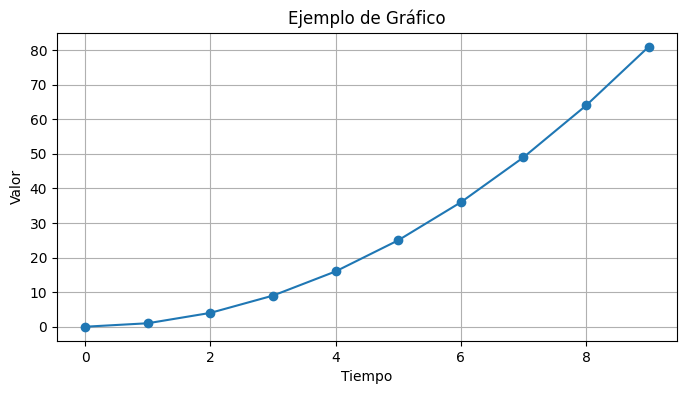

In [8]:

# Ejemplo 3: Encapsulamiento y métodos de instancia - Circulo
class Circulo:
    def __init__(self, radio):
        self.radio = radio

    def area(self):
        return math.pi * (self.radio ** 2)

    def perimetro(self):
        return 2 * math.pi * self.radio

    def __str__(self):
        return f"Circulo(radio={self.radio})"


# Ejemplo 4: Integración con librerías para graficar - GraficoLineal
class GraficoLineal:
    def __init__(self, titulo="Gráfico Lineal", xlabel="Eje X", ylabel="Eje Y"):
        self.titulo = titulo
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.datos_x = []
        self.datos_y = []

    def agregar_punto(self, x, y):
        self.datos_x.append(x)
        self.datos_y.append(y)

    def graficar(self):
        plt.figure(figsize=(8, 4))
        plt.plot(self.datos_x, self.datos_y, marker="o", linestyle="-")
        plt.title(self.titulo)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.grid(True)
        plt.show()

# Uso de la clase Circulo
circulo1 = Circulo(5)
print(f"Área del {circulo1}: {circulo1.area():.2f}")
print(f"Perímetro del {circulo1}: {circulo1.perimetro():.2f}")

# Uso de la clase GraficoLineal para graficar una función (ejemplo: y = x^2)
grafico = GraficoLineal(titulo="Ejemplo de Gráfico", xlabel="Tiempo", ylabel="Valor")
for x in range(10):
    grafico.agregar_punto(x, x**2)
grafico.graficar()



Acontinuación creamos la clase VisualizadorGrafo, la cual se encarga de graficar un grafo utilizando las librerías NetworkX y Matplotlib. Permite definir la ubicación de cada nodo a través de un diccionario de posiciones con formato: { nodo: (x, y) }.

Ejemplo de uso:
    1. Crear una instancia de VisualizadorGrafo.
    2. Agregar aristas al grafo con sus respectivos pesos.
    3. Definir un diccionario con las posiciones de cada nodo.
    4. Llamar al método graficar() pasando el diccionario de posiciones.

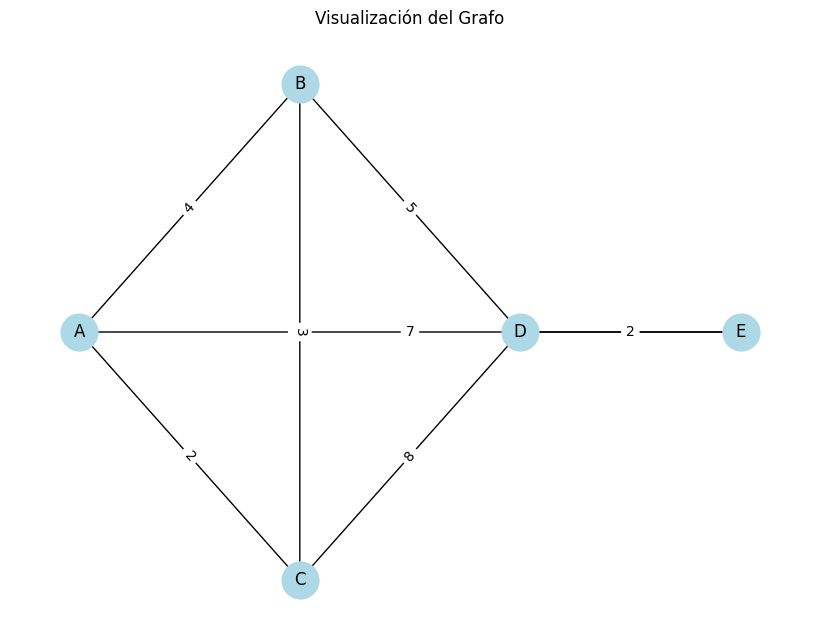

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

class VisualizadorGrafo:
    def __init__(self):
        # Se crea un grafo 
        self.grafo = nx.Graph()

    def agregar_arista(self, origen, destino, peso):
        """
        Agrega una arista al grafo con el peso especificado.
        Si los nodos no existen, se añaden automáticamente.
        """
        self.grafo.add_edge(origen, destino, weight=peso)
        # Se asegura de que ambos nodos existan en el grafo
        self.grafo.add_node(origen)
        self.grafo.add_node(destino)

    def graficar(self, posiciones=None):
        """
        Grafica el grafo.
        
        Parámetros:
            posiciones: Diccionario que define la posición de cada nodo con el formato { nodo: (x, y) }.
                        Si no se proporciona, se utiliza un layout automático.
        """
        # Si no se proporcionan posiciones, se utiliza el layout por defecto de NetworkX.
        if posiciones is None:
            posiciones = nx.spring_layout(self.grafo)

        plt.figure(figsize=(8, 6))
        # Dibujar nodos, aristas y etiquetas
        nx.draw(self.grafo, pos=posiciones, with_labels=True, node_size=700, node_color='lightblue', arrows=True)
        etiquetas = nx.get_edge_attributes(self.grafo, 'weight')
        nx.draw_networkx_edge_labels(self.grafo, pos=posiciones, edge_labels=etiquetas)
        plt.title("Visualización del Grafo")
        plt.axis("off")
        plt.show()

# Crear una instancia del visualizador
visualizador = VisualizadorGrafo()

# Agregar aristas de ejemplo con sus respectivos pesos
visualizador.agregar_arista('A', 'B', 4)
visualizador.agregar_arista('A', 'C', 2)
visualizador.agregar_arista('B', 'D', 5)
visualizador.agregar_arista('C', 'B', 3)
visualizador.agregar_arista('C', 'D', 8)
visualizador.agregar_arista('D', 'E', 2)
visualizador.agregar_arista('E', 'A', 7)

# Definir posiciones personalizadas para cada nodo (coordenadas)
posiciones_personalizadas = {
    'A': (0, 0),
    'B': (2, 1),
    'C': (2, -1),
    'D': (4, 0),
    'E': (6, 0)
}

# Graficar el grafo utilizando las posiciones personalizadas
visualizador.graficar(posiciones=posiciones_personalizadas)
